
# The real-estate dataset

A real estate agent currently only has Single-Family housed in his portfolio. He wants to expand his business to apartments, but he doesn't have enough experience to give reliable appraisels. Getting the necessary experience would take a lot of time and he doesn't have any colleagues to fall back on. He knows we are following a machine learning course and has a brilliant idea. He give us a data-set with a lot of information on real estate, including the known selling price (tx_price).  He asks us to build a real-estate pricing model for apartmens.

## 0. Installing and Loading packages and dataset

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')



C:\Users\Victo\AppData\Local\Temp\ipykernel_11316\3221062668.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


In [2]:
df = pd.read_csv('real_estate_data.csv')

## 1. Data exploration

The first thing that you do when you get a dataset, is ALWAYS to explore the data, to get an idea of what is in the data.

### a) The basics 
+ Number of features
+ Number of observation
+ Data types
+ Missingness

First, find out how many features and observations there are.

In [3]:
df.shape

(1883, 26)

There are 1883 observations and 26 features. Now let's take a closer look to these features. What are their names, what data type are they and how many missing data do each of them have?

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1883 entries, 0 to 1882
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tx_price            1883 non-null   int64  
 1   beds                1883 non-null   int64  
 2   baths               1883 non-null   int64  
 3   sqft                1883 non-null   int64  
 4   year_built          1883 non-null   int64  
 5   lot_size            1883 non-null   int64  
 6   property_type       1883 non-null   object 
 7   exterior_walls      1660 non-null   object 
 8   roof                1529 non-null   object 
 9   basement            1657 non-null   float64
 10  restaurants         1883 non-null   int64  
 11  groceries           1883 non-null   int64  
 12  nightlife           1883 non-null   int64  
 13  cafes               1883 non-null   int64  
 14  shopping            1883 non-null   int64  
 15  arts_entertainment  1883 non-null   int64  
 16  beauty

We see 23 continuous variables (float64 + int64) and 3 'objects'. 'int64' refers to integers and are whole numbers (no fractional part, or in other words, no decimals). 'float64' are floats, which means there is a fractional part. 'objects' are features containing text.
We also see some missing data for exterior_walls, roof and basement. We will need to do something about these missing data in the next step (cleaning data). 

Next, we  take a look at the beginning of the dataset to find out more about our features.

### b) Look at the data

+ Do the columns make sense?
+ Do the values in those columns make sense?
+ Are the values on the right scale?

In [5]:
df.iloc[:,0:15].head()

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,107,9,30,19,89
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,105,15,6,13,87
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,183,13,31,30,101
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,198,9,38,25,127
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,149,7,22,20,83


In [6]:
df.iloc[:,15:26].head()

,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
0,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013
1,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006
2,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012
3,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005
4,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002


The columns and the values seem to make sense (e.g the right scales). Except for the 0-values in lot-size. These are probably missing values. The three 'object' features do seem to be categorical. So, I will convert there data type to 'category'.

In [7]:
df['exterior_walls'] = df['exterior_walls'].astype('category')#
df['property_type']= df['property_type'].astype('category')
df['roof']= df['roof'].astype('category')


### c) Look at the descriptives
+ What is the min, max, mean?
+ Can you detect outliers?
+ How many categories for the categorical features?

We will have to look at the descriptives in two rounds, because we will not be able to see all features if we try to do it at once

In [8]:
df.iloc[:,0:15].describe(include='all')

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping
count,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1.883000e+03,1883,1660,1529,1657.0,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,16,16,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,Single-Family,Brick,Composition Shingle,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,1080,687,1179,NaN,NaN,NaN,NaN,NaN,NaN
mean,422839.807754,3.420605,2.579926,2329.398832,1982.963887,1.339262e+04,NaN,NaN,NaN,1.0,40.210303,4.505045,5.074881,5.325013,40.802443
std,151462.593276,1.068554,0.945576,1336.991858,20.295945,4.494930e+04,NaN,NaN,NaN,0.0,46.867012,4.491029,8.464668,7.539309,53.539296
min,200000.000000,1.000000,1.000000,500.000000,1880.000000,0.000000e+00,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,300000.000000,3.000000,2.000000,1345.000000,1970.000000,1.542000e+03,NaN,NaN,NaN,1.0,7.000000,1.000000,0.000000,0.000000,6.000000
50%,392000.000000,3.000000,3.000000,1907.000000,1986.000000,6.098000e+03,NaN,NaN,NaN,1.0,23.000000,3.000000,2.000000,3.000000,22.000000
75%,525000.000000,4.000000,3.000000,3005.000000,2000.000000,1.176100e+04,NaN,NaN,NaN,1.0,58.000000,7.000000,6.000000,6.000000,51.000000


In [9]:
df.iloc[:,15:26].describe()

,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
count,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000
mean,3.394052,23.416888,15.835369,38.601168,69.091875,65.085502,466.777483,140.454063,6.502921,2.793415,2007.111524
std,4.699787,25.776916,17.667717,6.634110,19.659767,16.953165,231.656645,72.929765,1.996109,0.505358,5.196898
min,0.000000,0.000000,0.000000,22.000000,11.000000,5.000000,88.000000,30.000000,1.000000,1.000000,1993.000000
25%,0.000000,4.000000,4.000000,33.000000,58.000000,54.000000,320.000000,94.000000,5.000000,3.000000,2004.000000
50%,2.000000,15.000000,10.000000,38.000000,73.000000,66.000000,426.000000,125.000000,7.000000,3.000000,2007.000000
75%,5.000000,35.000000,21.000000,43.000000,84.000000,78.000000,569.000000,169.000000,8.000000,3.000000,2011.000000
max,35.000000,177.000000,94.000000,69.000000,100.000000,100.000000,4508.000000,1374.000000,10.000000,4.000000,2016.000000


We can already see some interesting things here:
+ There are outliers: Two indicators for positive outliers are when the maximum value is a lot higher than the 75%-percentile and when the mean is higher than the median (50%-percentile). This is for example the case for tx_price. Can you find any other examples?
+ The standard deviation of basement is 0. This means all observations have the same value. This makes this features redundant. One option is to delete this feature. However, there are also a missing data in this feature. It could be that missingness means there is no basement here. We do not know this. Therefore, it may be an idea to create a feature that flags this missingness. We will discuss this further when explaining how to deal with missing data.
+ The minimum lot_size is 0. This is impossible. All values that are 0, are actually missing data in this feature. (For arts_entertainment, beauty_spas and active_life, the minimum is also 0, but this is not impossible).

### d) Plot the distributions
#### Numerical 
For the numerical features, we look at the histograms. These are the things we look for:
+ Distributions that are unexpected
+ Potential outliers that don't make sense
+ Features that should be binary (i.e. "wannabe indicator variables")
+ Boundaries that don't make sense
+ !!! Pay attention to the distribution of the target feature

array([[<Axes: title={'center': 'tx_price'}>,
        <Axes: title={'center': 'beds'}>,
        <Axes: title={'center': 'baths'}>,
        <Axes: title={'center': 'sqft'}>,
        <Axes: title={'center': 'year_built'}>],
       [<Axes: title={'center': 'lot_size'}>,
        <Axes: title={'center': 'basement'}>,
        <Axes: title={'center': 'restaurants'}>,
        <Axes: title={'center': 'groceries'}>,
        <Axes: title={'center': 'nightlife'}>],
       [<Axes: title={'center': 'cafes'}>,
        <Axes: title={'center': 'shopping'}>,
        <Axes: title={'center': 'arts_entertainment'}>,
        <Axes: title={'center': 'beauty_spas'}>,
        <Axes: title={'center': 'active_life'}>],
       [<Axes: title={'center': 'median_age'}>,
        <Axes: title={'center': 'married'}>,
        <Axes: title={'center': 'college_grad'}>,
        <Axes: title={'center': 'property_tax'}>,
        <Axes: title={'center': 'insurance'}>],
       [<Axes: title={'center': 'median_school'}>,
      

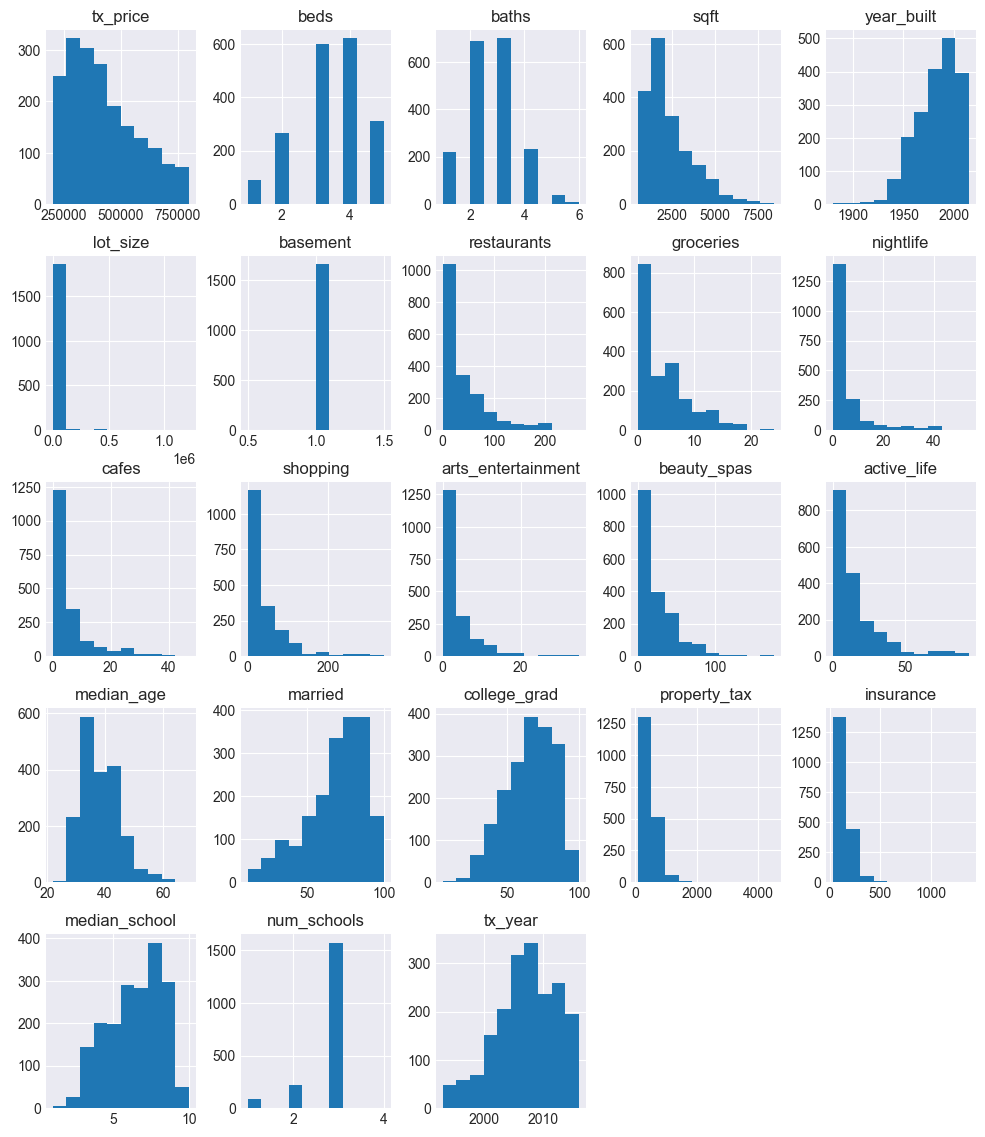

In [10]:
df.hist( figsize = (12,14))

+ We see extreme outliers for 'insurance', 'lot_size' and 'propery_tax'. 
+ There are a lot of rigth-skewed features
+ The outcome 'tx_price' is right-skewed. We will probably have to do a log-transformation during the feature engineering.

#### Categorical
For the categorical features, we use bar plots.
+ Look for sparse classes (classes that have a very small number of observations)
+ Look for classes that you might want to group together


<Axes: xlabel='count', ylabel='exterior_walls'>

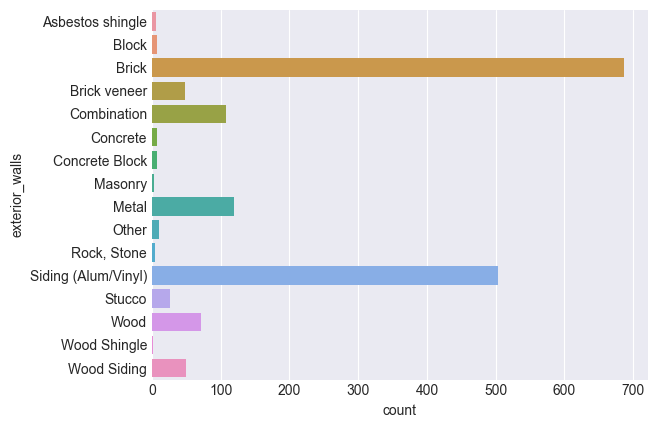

In [11]:
import seaborn as sns
sns.countplot(y=df['exterior_walls'])

There are a lot of sparse classes. These can cause your model to overfit (see later). We therefore will try to group these together in the feature engineering step.

<Axes: xlabel='count', ylabel='property_type'>

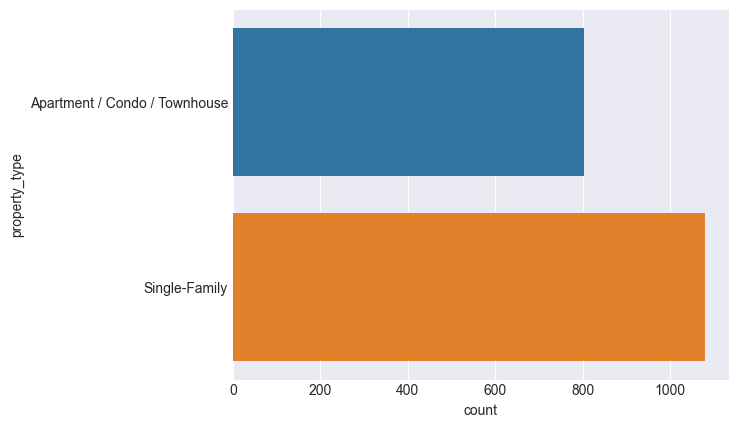

In [12]:
sns.countplot(y=df['property_type'])

There are only two classes. But, remember, we are only interested in the apartment class. So, the Single-Family class is irrelevant. This means we can drop all these observations in the data cleaning step and can then drop this feature. Note that we are keeping the three steps (exploratory analysis, cleaning and feature engineering) completely seperately here. This is for education purposes. In reality, these three steps are often intertwined.

<Axes: xlabel='count', ylabel='roof'>

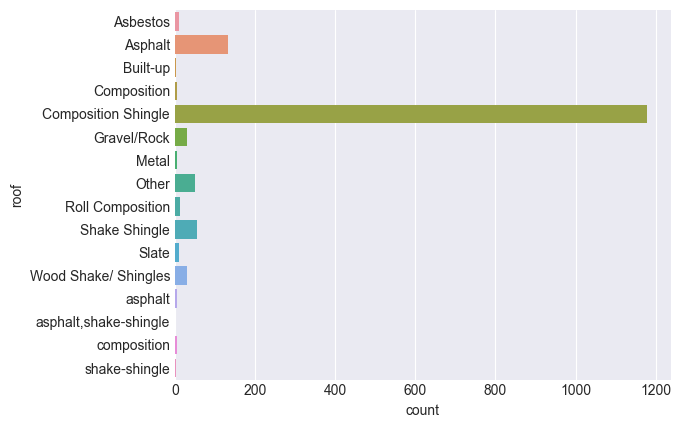

In [13]:
sns.countplot(y=df['roof'])

We sea a lot of structural errors here.
+ Asphalt = asphalt
+ shake-shingle = Shake Shingle
+ asphalt,shake-shingle = asphalt
+ Composition= composition

We will fix this during the data cleaning.

### e) Study the associations

#### Plot the association of all features with the outcome
+ Get an idea of which features seem to have an association with the outcome
+ See the possible influence of outliers

C:\Users\Victo\AppData\Local\Temp\ipykernel_11316\2853760133.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  features = features.drop(['tx_price'],1)


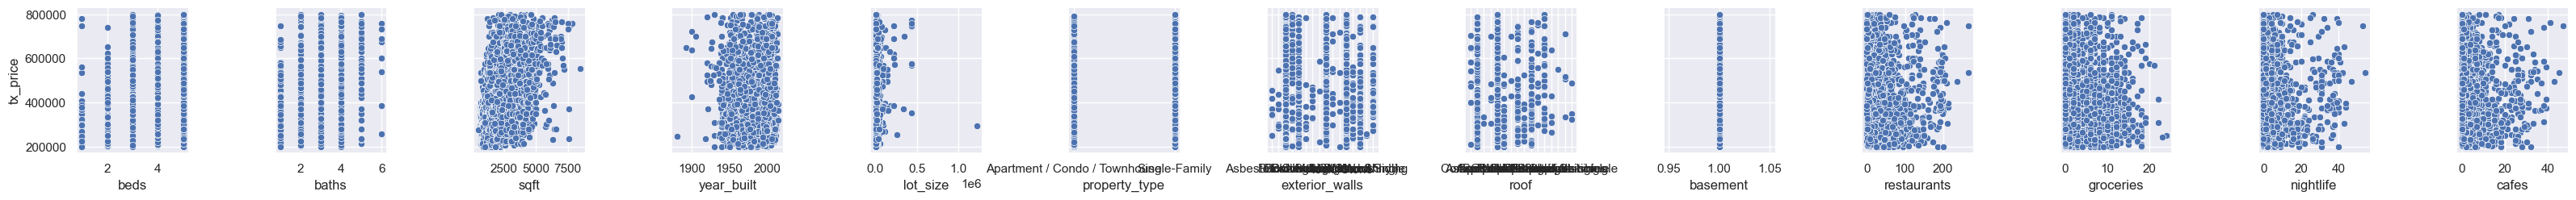

In [14]:
sns.set()
features = df.copy()
features = features.drop(['tx_price'],1)
xvars = features.columns
sns.pairplot(df, y_vars=['tx_price'],x_vars=xvars[0:13])
plt.show();

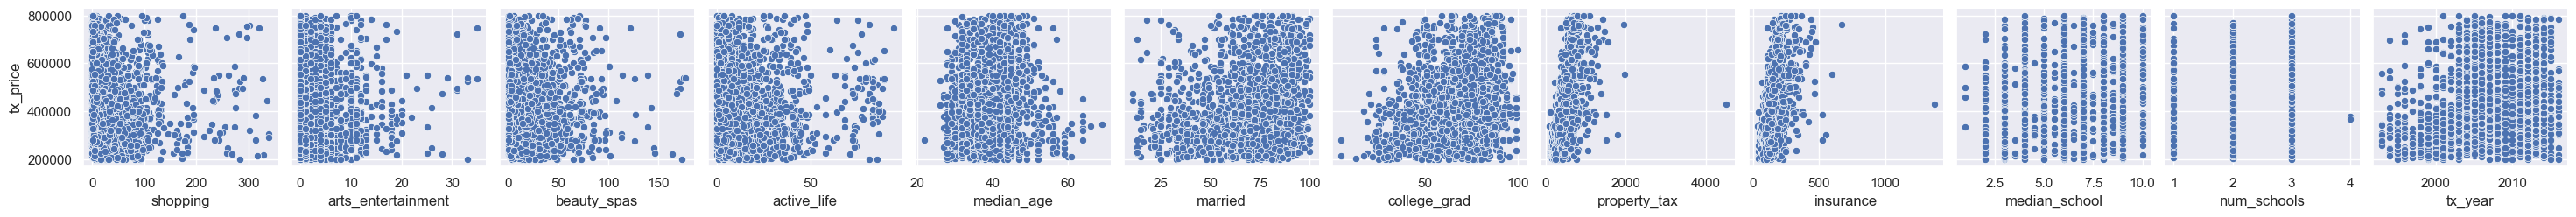

In [15]:
sns.set()
sns.pairplot(df, y_vars=['tx_price'],x_vars=xvars[13:26])
plt.show();

#### Look at all correlations 

We use a heatmap to do this.

+ Which features are strongly correlated with the target variable?
+ Are there interesting or unexpected strong correlations between other features?


C:\Users\Victo\AppData\Local\Temp\ipykernel_11316\1566418112.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


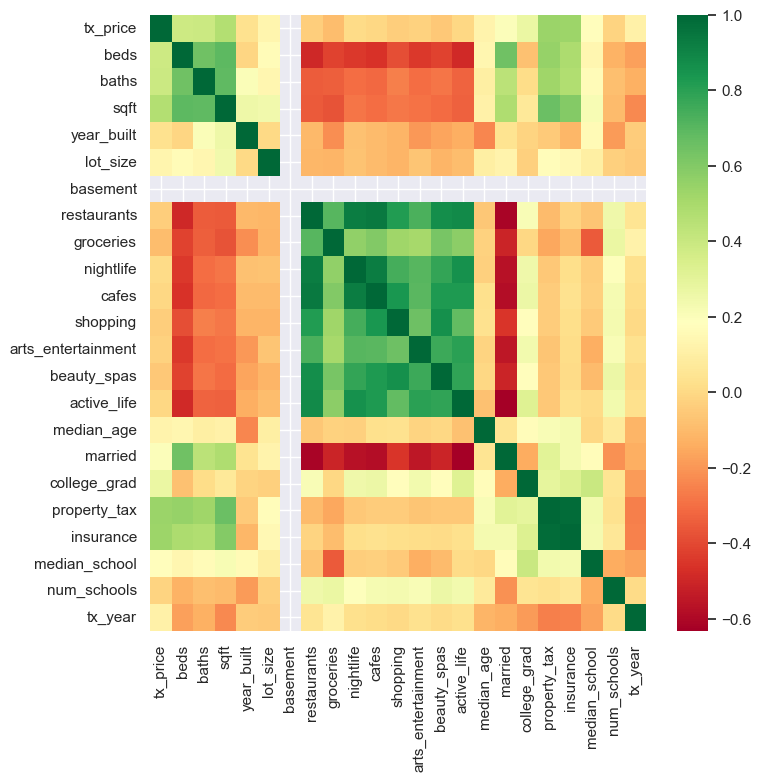

In [16]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corrmat, cmap='RdYlGn');


+ We see a very strong correlation between property tax and insurance.
+ We can also see that basement gives no results. Since the standard deviation is 0, the correlation does not exist;

## 2. Data cleaning

In the data cleaning step, we will fix most of the issues that we noticed during the exploratory analysis. 

### a) Remove unwanted observations and features
+ Duplicated observations: use the command .drop_duplicates() for this
+ Irrelevant observations: such as the single-Family houses
+ Irrelevant features
    - Features that are constants
    - Features that have a correlation of 1 with another feature 
    - Features that you do not want in your model (e.g for ethical reasons (discrimination) )

In [17]:
df_no_dup = df.copy()

df_no_dup.drop_duplicates()   # Remove the duplicates

print(df_no_dup.shape)               # check the remaining number of observations
df_no_dup.info()              

(1883, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1883 entries, 0 to 1882
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tx_price            1883 non-null   int64   
 1   beds                1883 non-null   int64   
 2   baths               1883 non-null   int64   
 3   sqft                1883 non-null   int64   
 4   year_built          1883 non-null   int64   
 5   lot_size            1883 non-null   int64   
 6   property_type       1883 non-null   category
 7   exterior_walls      1660 non-null   category
 8   roof                1529 non-null   category
 9   basement            1657 non-null   float64 
 10  restaurants         1883 non-null   int64   
 11  groceries           1883 non-null   int64   
 12  nightlife           1883 non-null   int64   
 13  cafes               1883 non-null   int64   
 14  shopping            1883 non-null   int64   
 15  arts_entertainment  1883 no

We still have 1883 observations. This means there were no duplicates.

In [18]:
df_app = df_no_dup.copy()

df_app = df_no_dup[df_no_dup['property_type'] == 'Apartment / Condo / Townhouse']

df_app.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 803 entries, 0 to 1610
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tx_price            803 non-null    int64   
 1   beds                803 non-null    int64   
 2   baths               803 non-null    int64   
 3   sqft                803 non-null    int64   
 4   year_built          803 non-null    int64   
 5   lot_size            803 non-null    int64   
 6   property_type       803 non-null    category
 7   exterior_walls      711 non-null    category
 8   roof                588 non-null    category
 9   basement            629 non-null    float64 
 10  restaurants         803 non-null    int64   
 11  groceries           803 non-null    int64   
 12  nightlife           803 non-null    int64   
 13  cafes               803 non-null    int64   
 14  shopping            803 non-null    int64   
 15  arts_entertainment  803 non-null    int

We only keep the apartments and end up with only 803 observations. This checks out with the barplot we made of property_type. Since 'property_type' now only consists out of one observation, we can remove this feature

In [19]:
df_app = df_app.drop(['property_type'],1)
df_app.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 803 entries, 0 to 1610
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tx_price            803 non-null    int64   
 1   beds                803 non-null    int64   
 2   baths               803 non-null    int64   
 3   sqft                803 non-null    int64   
 4   year_built          803 non-null    int64   
 5   lot_size            803 non-null    int64   
 6   exterior_walls      711 non-null    category
 7   roof                588 non-null    category
 8   basement            629 non-null    float64 
 9   restaurants         803 non-null    int64   
 10  groceries           803 non-null    int64   
 11  nightlife           803 non-null    int64   
 12  cafes               803 non-null    int64   
 13  shopping            803 non-null    int64   
 14  arts_entertainment  803 non-null    int64   
 15  beauty_spas         803 non-null    int

C:\Users\Victo\AppData\Local\Temp\ipykernel_11316\1719783958.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_app = df_app.drop(['property_type'],1)


We removed the feature 'property_type'. Notice that we always check our info to see if what we wanted to happen actually happened.

### b) Fix structural errors

Now, we want to fix structural errors, such as the ones we saw when looking at the barplot of 'roof'. The main problem there, was that some categories appeared twice, once with a capital, once without. The argument .str.capitalize() can fix this. (You do not need to know all these arguments by heart. Google is your friend!)

In [20]:
df_app['roof'] = df_app['roof'].str.capitalize()
df_app['roof'][df_app['roof'] == 'Shake-shingle'] = 'Shake shingle'

C:\Users\Victo\AppData\Local\Temp\ipykernel_11316\3826159869.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_app['roof'][df_app['roof'] == 'Shake-shingle'] = 'Shake shingle'


<Axes: xlabel='count', ylabel='roof'>

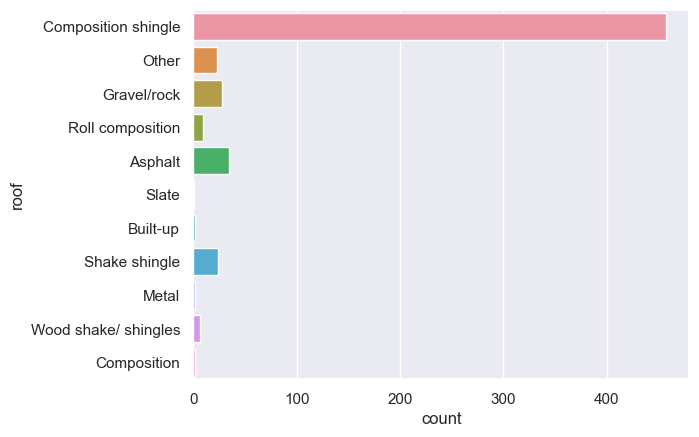

In [21]:
sns.countplot(y=df_app['roof'])

We remade the barplot to see what happened. The capitalizing removed some categories. We can also see that the one observation that had two categories has already disappeared when only selecting the apartments. Only the problem with 'Shake shingle' and 'Shake-shingle' remains. We fix this next.

In [22]:
df_app['roof'][df_app['roof'] == 'Shake-shingle'] = 'Shake shingle'


C:\Users\Victo\AppData\Local\Temp\ipykernel_11316\228375610.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_app['roof'][df_app['roof'] == 'Shake-shingle'] = 'Shake shingle'


<Axes: xlabel='count', ylabel='roof'>

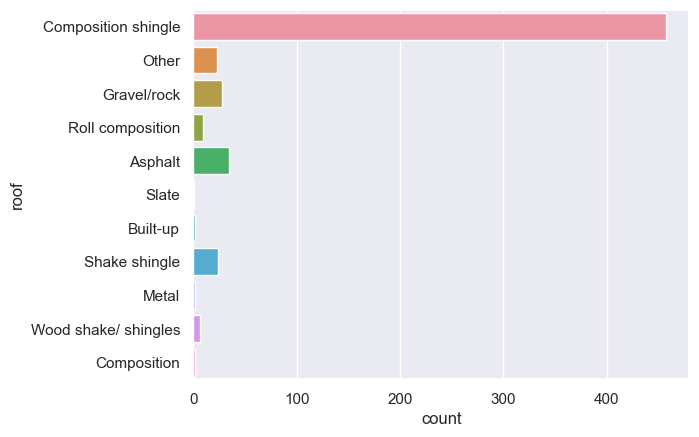

In [23]:
sns.countplot(y=df_app['roof'])

In [24]:
df_app.info()
df_app['roof']= df_app['roof'].astype('category')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 803 entries, 0 to 1610
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tx_price            803 non-null    int64   
 1   beds                803 non-null    int64   
 2   baths               803 non-null    int64   
 3   sqft                803 non-null    int64   
 4   year_built          803 non-null    int64   
 5   lot_size            803 non-null    int64   
 6   exterior_walls      711 non-null    category
 7   roof                588 non-null    object  
 8   basement            629 non-null    float64 
 9   restaurants         803 non-null    int64   
 10  groceries           803 non-null    int64   
 11  nightlife           803 non-null    int64   
 12  cafes               803 non-null    int64   
 13  shopping            803 non-null    int64   
 14  arts_entertainment  803 non-null    int64   
 15  beauty_spas         803 non-null    int

It worked! We went from 16 classes to 11 classes just by fixing these structural errors. We will probably want to reduce that further, by handling these sparse classes in the next step (feature engineering).

### c) Deal with unwanted outliers

During our exploratory analysis, we saw extreme outliers for 'insurance', 'lot_size' and 'propery_tax'. We did already remove a lot of data, so let's first check if they are still in the data.

C:\Users\Victo\AppData\Local\Temp\ipykernel_11316\1319415185.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  features = features.drop(['tx_price'],1)


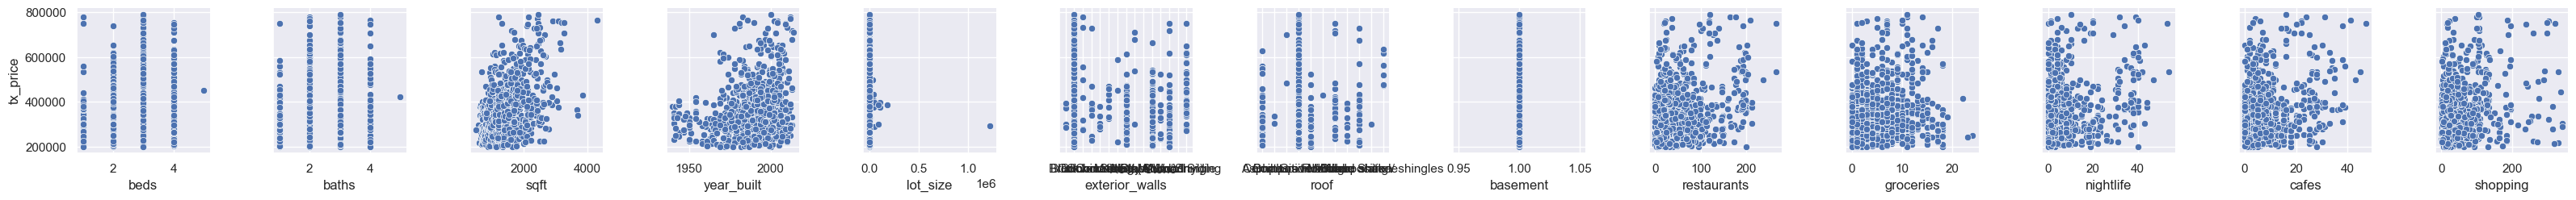

In [25]:
sns.set()
features = df_app.copy()
features = features.drop(['tx_price'],1)
xvars = features.columns
sns.pairplot(df_app, y_vars=['tx_price'],x_vars=xvars[0:13])
plt.show();

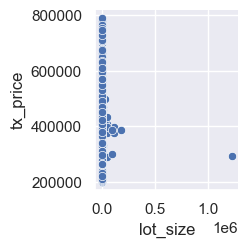

In [26]:
sns.pairplot(df_app, y_vars=['tx_price'],x_vars=xvars[4])
plt.show();

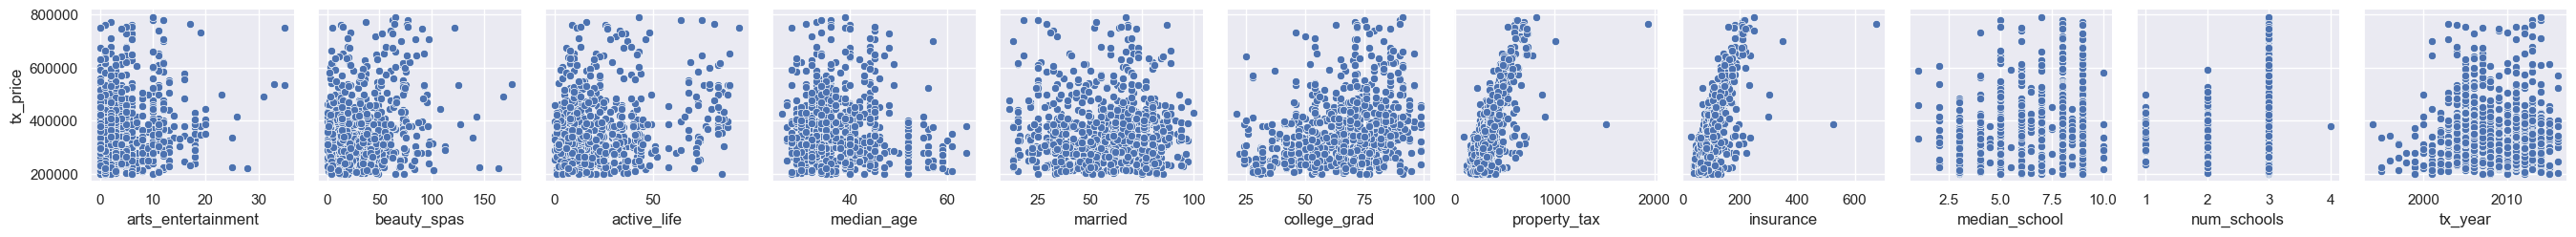

In [27]:
sns.set()
sns.pairplot(df_app, y_vars=['tx_price'],x_vars=xvars[13:25])
plt.show();

The most extreme outliers for 'property_tax' and 'insurance' have already been removed. The ones that are left do not seem impossible values. Lot_size still has a very extreme value.

In [28]:
df_app[df_app['lot_size'] > 100000]

,tx_price,beds,baths,sqft,year_built,lot_size,exterior_walls,roof,basement,restaurants,...,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
26,377000,1,1,709,2005,111513,Wood Siding,NaN,NaN,213,...,91,88,33.0,40.0,96.0,316.0,109.0,5.0,3.0,2008
44,397400,1,1,771,2005,111513,Wood Siding,NaN,NaN,213,...,91,88,33.0,40.0,96.0,345.0,119.0,5.0,3.0,2005
102,292999,2,1,875,1950,1220551,Brick,NaN,NaN,63,...,42,44,33.0,35.0,87.0,230.0,79.0,6.0,3.0,2014
172,385000,2,2,915,2005,183387,Brick,NaN,NaN,146,...,49,58,30.0,46.0,41.0,265.0,92.0,7.0,3.0,2006


The second largest lot size is 183 387 square feet. (around 17 037 square meter) The largest lot size is 1 220 551 square feet (113 346 square meter). This seems to be very large. However, I do not know for sure if this is a mistake. There is only ONE, and only ONE instance where it is ok to throw out outliers: that is if you are sure the observation is a mistake
+ the value is not possible
+ after checking, you find out the observation was wrongly recorded (typing error)

Otherwise, you keep the outlier. In our case, we found an outlier, but we do not have real evidence it is a mistake. If the lot size had been negative, for example, we would have known not to trust this example. In reality, you would probably ask the real estate agent to check this observation. Let's say our real estate agent came back to you and said, it was a mistake. The lot size is '122 551' square feet.

In [29]:
df_app['lot_size'][df_app['lot_size'] > 1000000] = 122551

C:\Users\Victo\AppData\Local\Temp\ipykernel_11316\4027171447.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_app['lot_size'][df_app['lot_size'] > 1000000] = 122551


### d) Handle missing data

There are a few possibilites to handle missing data:
+ drop the observation (of features) with missing data
+ impute the missing values
    - categorical: mode
    - continuous: mean, median or more fancy imputer (e.g mice)
+ Categorical: create an extra class 'missing'
+ Continuous: impute the missing values + flag the missingness

Unless almost all info is missing, the last two options are the best way to go.

Let's see how much missingness we still have:

In [30]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 803 entries, 0 to 1610
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tx_price            803 non-null    int64   
 1   beds                803 non-null    int64   
 2   baths               803 non-null    int64   
 3   sqft                803 non-null    int64   
 4   year_built          803 non-null    int64   
 5   lot_size            803 non-null    int64   
 6   exterior_walls      711 non-null    category
 7   roof                588 non-null    category
 8   basement            629 non-null    float64 
 9   restaurants         803 non-null    int64   
 10  groceries           803 non-null    int64   
 11  nightlife           803 non-null    int64   
 12  cafes               803 non-null    int64   
 13  shopping            803 non-null    int64   
 14  arts_entertainment  803 non-null    int64   
 15  beauty_spas         803 non-null    int

Only 'exterior_walls', 'roof' and 'basement' have missingness in them. And, remember, in our exploratory analysis, we also noticed that values of 0 were actually missing for lot_size. 



#### Continuous features: mean imputing


We will first need to identify the 0-values as missing values. 

In [31]:
# Identify the missing values
df_app['lot_size'] = df_app['lot_size'].replace(0,np.nan)
df_app['lot_size'].isnull().sum()    # Check how many of the lot sizes are missing. 332 of the 803 is quite a lot.

332

Now, we will first create a new feature that flags the missingness in the feature.

In [32]:
df_app['Missing_lot_size'] = df_app['lot_size'].isnull() 

We will use a simple mean imputation for now. (If you are feeling bold, you can try mice (IterativeImputer) yourself) We are going to calculate the mean of the feature and assign this mean value to all the missing values. You could do this by hand, BUT when you get a new dataset to predict in the future, you have the impute it with the exact same value (So not by the mean of the new value). Therefore, it is better to use a transformation object that can be saved and later applied to a new dataset. (Always remember that every step you perform on your data, you have to be able to replicate on future data. We will use pipelines for this, but we will see more about this later on.)

In [33]:
df_imputed = df_app.copy()

# import Imputer 
from sklearn.impute import SimpleImputer

# Create an imputer object that looks for 'Nan' values, then replaces them with the mean value of the feature by columns (axis=0)
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Train the imputor on the dataset
mean_imputer = mean_imputer.fit(np.array(df_app['lot_size']).reshape(-1, 1) )

# Apply the imputer to the dataset (This imputer can also be used on future datasets)
df_imputed['lot_size'] = mean_imputer.transform(np.array(df_app['lot_size']).reshape(-1, 1) )

In [34]:
df_imputed.head()

,tx_price,beds,baths,sqft,year_built,lot_size,exterior_walls,roof,basement,restaurants,...,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year,Missing_lot_size
0,295850,1,1,584,2013,4393.2569,Wood Siding,NaN,NaN,107,...,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013,True
1,216500,1,1,612,1965,4393.2569,Brick,Composition shingle,1.0,105,...,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006,True
2,279900,1,1,615,1963,4393.2569,Wood Siding,NaN,NaN,183,...,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012,True
3,379900,1,1,618,2000,33541.0000,Wood Siding,NaN,NaN,198,...,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005,False
4,340000,1,1,634,1992,4393.2569,Brick,NaN,NaN,149,...,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002,True


#### Categorical features: add a 'missing' class

We want basement to be a categorical feature, with two classes: 1 and missing. So we will first convert 'basement' to type category.

In [35]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 803 entries, 0 to 1610
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tx_price            803 non-null    int64   
 1   beds                803 non-null    int64   
 2   baths               803 non-null    int64   
 3   sqft                803 non-null    int64   
 4   year_built          803 non-null    int64   
 5   lot_size            803 non-null    float64 
 6   exterior_walls      711 non-null    category
 7   roof                588 non-null    category
 8   basement            629 non-null    float64 
 9   restaurants         803 non-null    int64   
 10  groceries           803 non-null    int64   
 11  nightlife           803 non-null    int64   
 12  cafes               803 non-null    int64   
 13  shopping            803 non-null    int64   
 14  arts_entertainment  803 non-null    int64   
 15  beauty_spas         803 non-null    int

In [36]:
df_imputed['basement']= df_imputed['basement'].astype('category')

In [37]:
categorical = ['exterior_walls','roof', 'basement']
for col in categorical:
    df_imputed[col] = df_imputed[col].cat.add_categories('Missing')
    df_imputed[col] = df_imputed[col].fillna('Missing')

In [38]:
df_imputed.head()

,tx_price,beds,baths,sqft,year_built,lot_size,exterior_walls,roof,basement,restaurants,...,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year,Missing_lot_size
0,295850,1,1,584,2013,4393.2569,Wood Siding,Missing,Missing,107,...,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013,True
1,216500,1,1,612,1965,4393.2569,Brick,Composition shingle,1.0,105,...,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006,True
2,279900,1,1,615,1963,4393.2569,Wood Siding,Missing,Missing,183,...,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012,True
3,379900,1,1,618,2000,33541.0000,Wood Siding,Missing,Missing,198,...,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005,False
4,340000,1,1,634,1992,4393.2569,Brick,Missing,Missing,149,...,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002,True


## 3. Feature engineering
In the feature engineering step, we are refining the features that we will use. 
+ We will create new features out of the already existing ones 
+ We will refine the already existing features

### a) Create new features
This is the time to let your creativity run free. Scan your existing features and see if there are any new features that you can make by combining them. This can be additions (e.g the number of children= number of sons + number of daughters), subtractions (e.g weight loss based on weight before and weight after), multiplications (we will see an example below) of divisions (e.g cost per hour).

For example, we have information about the number of school (num_schools) and about the median score of the schools (median_school) in the area (median_schools). I want to have a lot of schools in my area, but only if they are good. I can capture this by multiplying both.


In [39]:
df_imputed['school_score'] = df_imputed['num_schools'] * df_imputed['median_school']

I could also calculate the property_tax per square feet

In [40]:
df_imputed['tax_per_sqft'] = df_imputed['property_tax']/ df_imputed['sqft']

Feel free to experiment a bit here. It is no problem if your newly engineered features turn out to not have an influence on the outcome. As long as there is enough data, too many features is not a problem. Most algorithms will automatically select the best features (and if they don't, you might not want to use them). The only situation where you might want to be a bit more selective, is if you only have a limited amount of observations for the amount of features you have (e.g already 150 features, but only 200 observations). Here, we had 26 feautures for 803 observations, which leaves us some room to engineer new features.

### b) Combine sparse classes

We had two categorical features with a lot of classes remaining that did not have a lot of observations in them. Let's see if we can do something about that.
#### roof

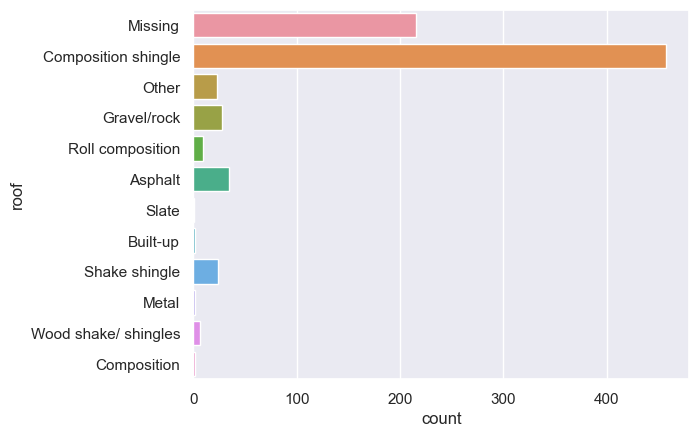

In [41]:
df_imputed['roof'] = df_imputed['roof'].astype('object')
sns.set()
sns.countplot(y=df_imputed['roof'])
plt.show()

In [42]:
df_imputed['roof'] = df_imputed['roof'].astype('object')
df_imputed['roof'].value_counts()

Composition shingle     457
Missing                 215
Asphalt                  34
Gravel/rock              28
Shake shingle            24
Other                    23
Roll composition          9
Wood shake/ shingles      6
Built-up                  2
Metal                     2
Composition               2
Slate                     1
Name: roof, dtype: int64

To do this, you might need some context knowledge. Or, since I know nothing about roofs, in this case, google was my friend. 
+ Google tells me that a composition roof is the same as composition shingle (! roll composition is something else). So I will group those two.

+ Google also teaches me that shake shingles and wood shingles are the same thing. So we will combine these as well

In [43]:
df_imputed['roof'][df_imputed['roof'] == 'Wood shake/ shingles'] = 'Shake shingle'
df_imputed['roof'][df_imputed['roof'] == 'Composition shingle'] = 'Composition'
df_imputed['roof'].value_counts()

C:\Users\Victo\AppData\Local\Temp\ipykernel_11316\2010827871.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imputed['roof'][df_imputed['roof'] == 'Wood shake/ shingles'] = 'Shake shingle'
C:\Users\Victo\AppData\Local\Temp\ipykernel_11316\2010827871.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imputed['roof'][df_imputed['roof'] == 'Composition shingle'] = 'Composition'


Composition         459
Missing             215
Asphalt              34
Shake shingle        30
Gravel/rock          28
Other                23
Roll composition      9
Built-up              2
Metal                 2
Slate                 1
Name: roof, dtype: int64

We still have 4 categories with less than 10 observations (three even only 2 or 1). We will put these in the 'other' category.

In [44]:
df_imputed['roof'][df_imputed['roof'] == 'Roll composition'] = 'Other'
df_imputed['roof'][df_imputed['roof'] == 'Metal'] = 'Other'
df_imputed['roof'][df_imputed['roof'] == 'Built-up'] = 'Other'
df_imputed['roof'][df_imputed['roof'] == 'Slate'] = 'Other'
df_imputed['roof'].value_counts()

C:\Users\Victo\AppData\Local\Temp\ipykernel_11316\2715377244.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imputed['roof'][df_imputed['roof'] == 'Roll composition'] = 'Other'
C:\Users\Victo\AppData\Local\Temp\ipykernel_11316\2715377244.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imputed['roof'][df_imputed['roof'] == 'Metal'] = 'Other'
C:\Users\Victo\AppData\Local\Temp\ipykernel_11316\2715377244.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

Composition      459
Missing          215
Other             37
Asphalt           34
Shake shingle     30
Gravel/rock       28
Name: roof, dtype: int64

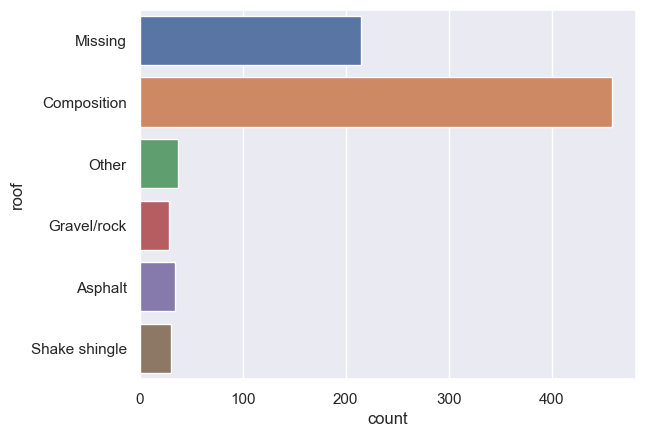

In [45]:
sns.set()
sns.countplot(y=df_imputed['roof'])
plt.show()

#### exterior_wall

In [46]:
df_imputed['exterior_walls'] = df_imputed['exterior_walls'].astype('object')
df_imputed['exterior_walls'].value_counts()

Brick                  381
Siding (Alum/Vinyl)    158
Missing                 92
Metal                   47
Wood Siding             40
Wood                    35
Stucco                  10
Combination              9
Brick veneer             8
Concrete Block           7
Concrete                 5
Block                    4
Other                    4
Masonry                  3
Name: exterior_walls, dtype: int64

We'l group Wood Siding and Wood together, masonry  and brick. All other classes that have 10 or less observations will be grouped as Other.

In [47]:
df_imputed['exterior_walls'][df_imputed['exterior_walls'] == 'Wood Siding'] = 'Wood'
df_imputed['exterior_walls'][df_imputed['exterior_walls'] == 'Masonry'] = 'Brick'

df_imputed['exterior_walls'][df_imputed['exterior_walls'] == 'Stucco'] = 'Other'
df_imputed['exterior_walls'][df_imputed['exterior_walls'] == 'Combination'] = 'Other'
df_imputed['exterior_walls'][df_imputed['exterior_walls'] == 'Brick veneer'] = 'Other'
df_imputed['exterior_walls'][df_imputed['exterior_walls'] == 'Concrete'] = 'Other'
df_imputed['exterior_walls'][df_imputed['exterior_walls'] == 'Concrete Block'] = 'Other'
df_imputed['exterior_walls'][df_imputed['exterior_walls'] == 'Block'] = 'Other'


df_imputed['exterior_walls'].value_counts()

C:\Users\Victo\AppData\Local\Temp\ipykernel_11316\3487558952.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imputed['exterior_walls'][df_imputed['exterior_walls'] == 'Wood Siding'] = 'Wood'
C:\Users\Victo\AppData\Local\Temp\ipykernel_11316\3487558952.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imputed['exterior_walls'][df_imputed['exterior_walls'] == 'Masonry'] = 'Brick'
C:\Users\Victo\AppData\Local\Temp\ipykernel_11316\3487558952.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

Brick                  384
Siding (Alum/Vinyl)    158
Missing                 92
Wood                    75
Other                   47
Metal                   47
Name: exterior_walls, dtype: int64

In [48]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 803 entries, 0 to 1610
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tx_price            803 non-null    int64   
 1   beds                803 non-null    int64   
 2   baths               803 non-null    int64   
 3   sqft                803 non-null    int64   
 4   year_built          803 non-null    int64   
 5   lot_size            803 non-null    float64 
 6   exterior_walls      803 non-null    object  
 7   roof                803 non-null    object  
 8   basement            803 non-null    category
 9   restaurants         803 non-null    int64   
 10  groceries           803 non-null    int64   
 11  nightlife           803 non-null    int64   
 12  cafes               803 non-null    int64   
 13  shopping            803 non-null    int64   
 14  arts_entertainment  803 non-null    int64   
 15  beauty_spas         803 non-null    int

### c) Create dummy variables (categorical features)
(Most) machine learning algorithms cannot directly handle categorical features
+ Cannot handle text (has to be numbers)
+ Simply assigning a number to each class (e.g 1= brown, 2= blond) is not a solution
    + Algorithm will assume 2 is bigger than 1 and thus that blond is bigger than brown
    
We will use one-hot encoding:
+ We create one dummy variable for each class
+ All observations that belong to the corresponding class get value one for that dummy variable, all other get value 0.


In [49]:
## I make sure all three categorical features are classified as 'object' to be able to check if they are categorical
df_imputed['basement']= df_imputed['basement'].astype('object') 

In [50]:
for col in df_imputed:
    if df_imputed[col].dtype ==  'object':
        dummies = pd.get_dummies(df_imputed[col], dummy_na=False, prefix=col)  #create dummies
        df_imputed = pd.concat([df_imputed, dummies],axis=1)                   # add dummies to dataset
        df_imputed.drop(columns=[col], inplace=True)                           # delete original feature

### d) Do log-transformation if necessary
We knew that the ditribution of our outcome was slightly skewed to the right. When you see this, you always have to ask yourself the question if you should log-transform your outcome. Why? Let's see what happens to the distribution when you do the log-transformation.

<Axes: >

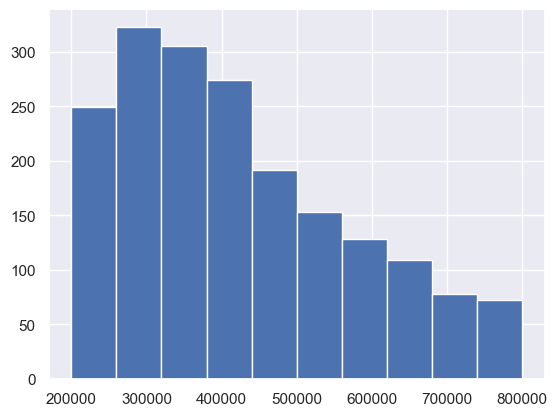

In [51]:
(df['tx_price']).hist()

<Axes: >

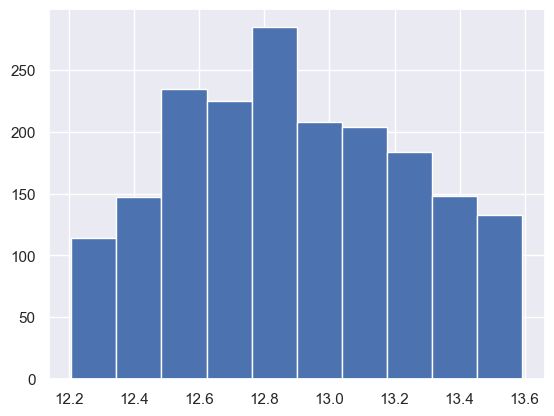

In [52]:
np.log1p(df['tx_price']).hist()

The distribution becomes more symmetrical and more closely resembles a normal distribution (with a little bit of imagination). This is already a very good reason to the log-transformation:
+ A lot of algorithms assume a normal distribution

A second reason to do the log-transformation has to do with the amount of weight each error gets.
- If we do not do the log-transformation, then giving a price taxation that is €50 000 to high, will be judged the same when the real price is 100 000 or when it is 1 000 000. 
- In reality, a difference of €50 000 would matter less if the real price is 1 000 000 then if the real price was €100 000 (because in the latter case, you have a lot more risk of scaring of potential buyers).
- When using the log-scale, an error of €50 000 will be judged more harshly for the lower-price ranges (see example on slides)

So, we will perform the log-transformation. If we log-transform the outcome, we also have to log-transform the other continuous features that are skewed.

We first take a new look to the distributions of the continuous features to refresh our memory.

array([[<Axes: title={'center': 'tx_price'}>,
        <Axes: title={'center': 'beds'}>,
        <Axes: title={'center': 'baths'}>,
        <Axes: title={'center': 'sqft'}>,
        <Axes: title={'center': 'year_built'}>],
       [<Axes: title={'center': 'lot_size'}>,
        <Axes: title={'center': 'restaurants'}>,
        <Axes: title={'center': 'groceries'}>,
        <Axes: title={'center': 'nightlife'}>,
        <Axes: title={'center': 'cafes'}>],
       [<Axes: title={'center': 'shopping'}>,
        <Axes: title={'center': 'arts_entertainment'}>,
        <Axes: title={'center': 'beauty_spas'}>,
        <Axes: title={'center': 'active_life'}>,
        <Axes: title={'center': 'median_age'}>],
       [<Axes: title={'center': 'married'}>,
        <Axes: title={'center': 'college_grad'}>,
        <Axes: title={'center': 'property_tax'}>,
        <Axes: title={'center': 'insurance'}>,
        <Axes: title={'center': 'median_school'}>],
       [<Axes: title={'center': 'num_schools'}>,
   

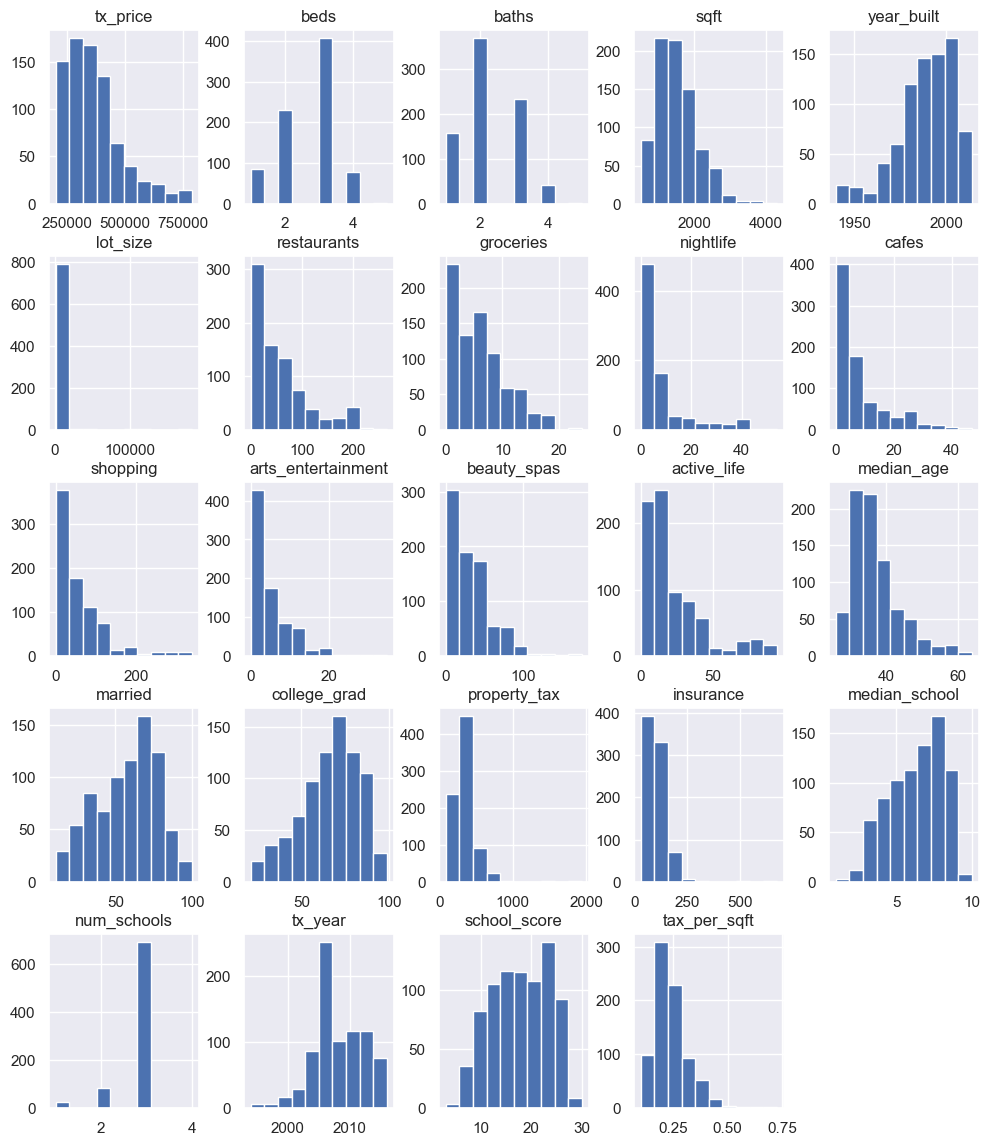

In [53]:
num = df_imputed.select_dtypes(include=['int64', 'float64']).columns
df_imputed[num].hist( figsize = (12,14))

We do not have to decide what is skewed ourselves. We can ask python to do this. We put the line at a skewness of 0.75.

array([[<Axes: title={'center': 'tx_price'}>,
        <Axes: title={'center': 'beds'}>,
        <Axes: title={'center': 'baths'}>,
        <Axes: title={'center': 'sqft'}>,
        <Axes: title={'center': 'year_built'}>],
       [<Axes: title={'center': 'lot_size'}>,
        <Axes: title={'center': 'restaurants'}>,
        <Axes: title={'center': 'groceries'}>,
        <Axes: title={'center': 'nightlife'}>,
        <Axes: title={'center': 'cafes'}>],
       [<Axes: title={'center': 'shopping'}>,
        <Axes: title={'center': 'arts_entertainment'}>,
        <Axes: title={'center': 'beauty_spas'}>,
        <Axes: title={'center': 'active_life'}>,
        <Axes: title={'center': 'median_age'}>],
       [<Axes: title={'center': 'married'}>,
        <Axes: title={'center': 'college_grad'}>,
        <Axes: title={'center': 'property_tax'}>,
        <Axes: title={'center': 'insurance'}>,
        <Axes: title={'center': 'median_school'}>],
       [<Axes: title={'center': 'num_schools'}>,
   

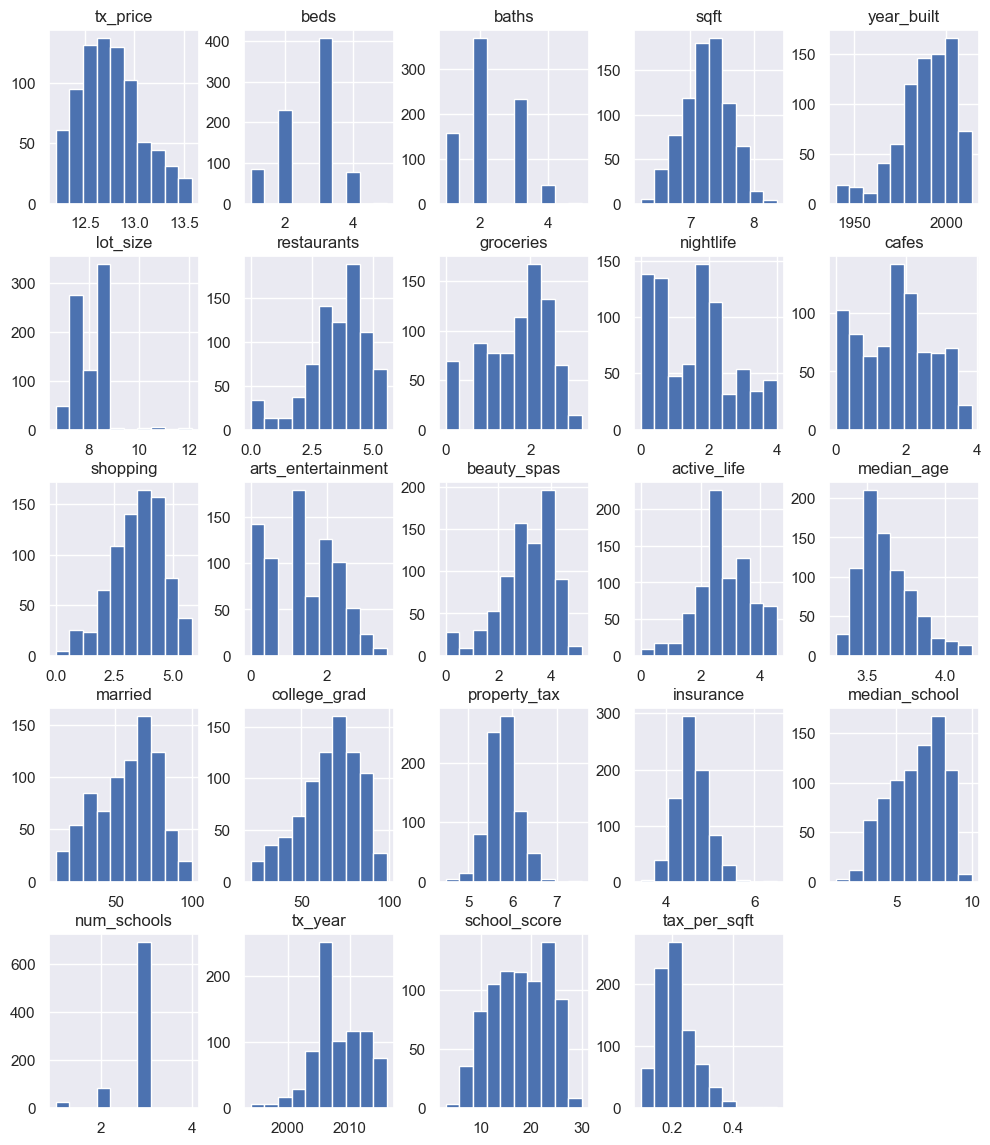

In [54]:
from scipy.stats import skew
skewed = df_imputed[num].apply(lambda x: skew(x.dropna().astype(float)))
skewed = skewed[skewed > 0.75]
skewed = skewed.index
#for col in skewed:
 #   df_log[col][df_log[col] < 0] = 0.01
df_imputed[skewed] = np.log1p(df_imputed[skewed])
df_imputed[num].hist( figsize = (12,14))

From our new histograms, we can see that most features now resemble normal distributions more closely.

In [55]:
# Storing cleaned dataset to use in class 3
df_imputed.to_csv('real_estate_cleaned.csv', index=False)

In [56]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 803 entries, 0 to 1610
Data columns (total 39 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   tx_price                            803 non-null    float64
 1   beds                                803 non-null    int64  
 2   baths                               803 non-null    int64  
 3   sqft                                803 non-null    float64
 4   year_built                          803 non-null    int64  
 5   lot_size                            803 non-null    float64
 6   restaurants                         803 non-null    float64
 7   groceries                           803 non-null    float64
 8   nightlife                           803 non-null    float64
 9   cafes                               803 non-null    float64
 10  shopping                            803 non-null    float64
 11  arts_entertainment                  803 non-

### d) Standardize continuous features

In [57]:
features = df_imputed.copy()
features = features.drop(['tx_price'],1)
num_feat = features.select_dtypes(include=['int64', 'float64']).columns

# standardisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_imputed[num_feat])
df_imputed[num_feat] = scaler.transform(df_imputed[num_feat])


#MinMaxScaler
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#scaler.fit(df_imputed[num_feat])
#df_imputed[num_feat] = scaler.transform(df_imputed[num_feat])


#Robustscaler
#from sklearn.preprocessing import RobustScaler
#scaler = RobustScaler()
#scaler.fit(df_imputed[num_feat])
#df_imputed[num_feat] = scaler.transform(df_imputed[num_feat])




C:\Users\Victo\AppData\Local\Temp\ipykernel_11316\82150818.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  features = features.drop(['tx_price'],1)


Ok, now you know all the basics on how to clean a dataset. Let's try it on the data from your project!